In [31]:
#!pip install sweetviz 
#and/or Cufflinks (for interactive graphs)
import pandas as pd
import numpy as np
import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
#

#### Taking into consideration the tasks required in the machine learning section, use appropriate data cleaning, engineering, extraction and/or other techniques to structure and enrich your data. Rationalize your decisions and implementation, including evidence of how your process has addressed the problems identified in the EDA (Exploratory Data Analysis) stage and how your structured data will assist in the analysis stage. This should include visualizations to illustrate your work and evidence to support your methodology

In [32]:
df=pd.read_csv('bcms_commencement_notices_2017.csv')  ###  read in the dataset 

In [33]:
df.head(5) ###  examine thefirst 5 rows

Local Authority  Jan  Feb  Mar  Apr  May  June  July  Aug  Sept  Oct  Nov  \
0   Carlow County    4    1    3    3    9    10    10    4     5    7    5   
1    Cavan County    6    8    7    8    9     4    10    8    12   13    8   
2    Clare County    4   23   15   13   17    22    16   19    12   11   15   
3       Cork City    4    4    4    6    2     7     6    3     4    7    4   
4     Cork County   26   47   90   65   88    74    87   63    84   51   69   

   Dec  
0    9  
1    0  
2    8  
3    3  
4   50

In [34]:
df.info() ### check data types, missing values, memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Local Authority  33 non-null     object
 1   Jan              33 non-null     int64 
 2   Feb              33 non-null     int64 
 3   Mar              33 non-null     int64 
 4   Apr              33 non-null     int64 
 5   May              33 non-null     int64 
 6   June             33 non-null     int64 
 7   July             33 non-null     int64 
 8   Aug              33 non-null     int64 
 9   Sept             33 non-null     int64 
 10  Oct              33 non-null     int64 
 11  Nov              33 non-null     int64 
 12  Dec              33 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 3.5+ KB


In [35]:
df.rename({'Local Authority': 'Authority'}, axis=1, inplace=True)  #### Rename column for clarity and to remove whitespace.
df

Authority  Jan  Feb  Mar  Apr  May  June  July  Aug  Sept  \
0               Carlow County    4    1    3    3    9    10    10    4     5   
1                Cavan County    6    8    7    8    9     4    10    8    12   
2                Clare County    4   23   15   13   17    22    16   19    12   
3                   Cork City    4    4    4    6    2     7     6    3     4   
4                 Cork County   26   47   90   65   88    74    87   63    84   
5              Donegal County    9   18   27   24   17    23    18   15    22   
6                 Dublin City   10   15   22   23   18    16    17   16    13   
7      Dun-Laoghaire Rathdown    5   17   18   11   22    25    22   11    15   
8               Fingal County   16   20   21   15   23    18    14   23    22   
9                 Galway City    2    3    2    1    6     5     3    4     2   
10              Galway County   22   19   37   32   40    42    34   29    35   
11               Kerry County   10   18   18   28   18    24    22   17    18   
12             Kildare County   19   21   20   31   35    31    21   35    21   
13            Kilkenny County    9   15   11   13   21    11    17   14    25   
14               Laois County    5   11   14   14   18    10    12    9     6   
15             Leitrim County    2    3    3    5    2     2     0    5     2   
16   Limerick City and County    6   15   25   23   20    17    20   18    14   
17            Longford County    2    4    3    9    5     2     6    4     8   
18               Louth County   14   14   21   24   18    21    19   19    17   
19                Mayo County   14   12   26   25   28    28    16   27    28   
20               Meath County   27   31   41   42   44    52    45   40    38   
21            Monaghan County   12    7   11    9    9    13    15   18     8   
22              Offaly County    3    5    9    7   18     6     8    5     7   
23           Roscommon County    3    8    9    9   11    12     6   11     7   
24               Sligo County    7    5   10    4    5    13     9    5     6   
25        South Dublin County   12   10   15   18    8    16    10    5    19   
26           Tipperary County    3   17   11    9   15    17    20   15    11   
27  Waterford City and County    7   11    9   10   16    14     9   13     8   
28           Westmeath County    8    9   11   14   14    14    10   14     8   
29             Wexford County   18   25   19   24   32    24    24   28    20   
30             Wicklow County   17   12    9   18   17    21    16    5    13   
31   Dublin Local Authorities   43   62   76   67   71    75    63   55    69   
32        Greater Dublin Area  120  140  167  182  185   200   164  154   158   

    Oct  Nov  Dec  
0     7    5    9  
1    13    8    0  
2    11   15    8  
3     7    4    3  
4    51   69   50  
5    25   24   12  
6    15   22   11  
7    11   19    7  
8    29   31   17  
9     3    2    4  
10   26   35   22  
11   17   15   17  
12   32   33   14  
13   10    8    7  
14   14   12    8  
15    1    3    0  
16   20   21   12  
17    2    1    2  
18   15   14   10  
19   20   22   13  
20   44   31   23  
21   12    8    8  
22    6   10    2  
23    6   10    4  
24    6    7    6  
25   26   17    3  
26   18    9    9  
27    9   13    6  
28   11    9    6  
29   24   15   20  
30   14   21   15  
31   81   89   38  
32  186  188  100

In [36]:
df.columns  ###  Check if we need all the columns.

Index(['Authority', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug',
       'Sept', 'Oct', 'Nov', 'Dec'],
      dtype='object')

In [37]:
#  change datatype to category.  It's an effective use of memory.  It will assist our ML model performance too.
df.Authority = df.Authority.astype("category")
#  Our month columns are integers.  The dataset is now ideal for regression, clustering and logistic regression, for example.

####	Modern construction has a great dependence on technology and relies upon visualizations to communicate information, this includes web based, mobile based and many other digital transmission formats. Develop an interactive dashboard tailored to interested parties in the construction industry, using Tufte's principles, to showcase the information/evidence gathered following your Machine Learning 

In [38]:
### Create an interactive dashboard using sweetviz

                                             |          | [  0%]   00:00 -> (? left)

Report Data EDA.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



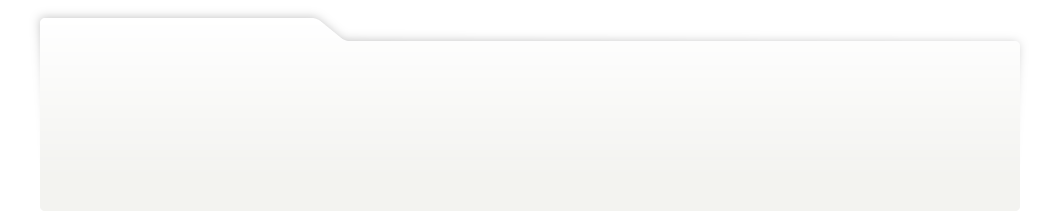
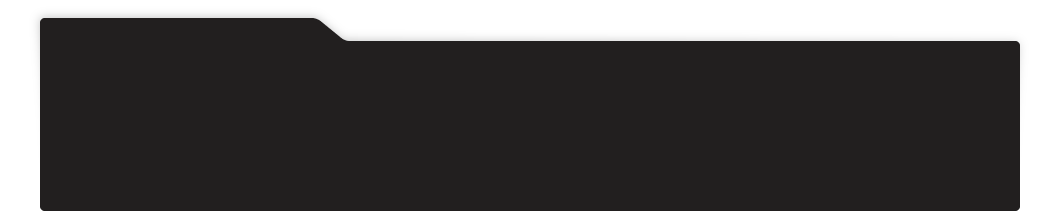
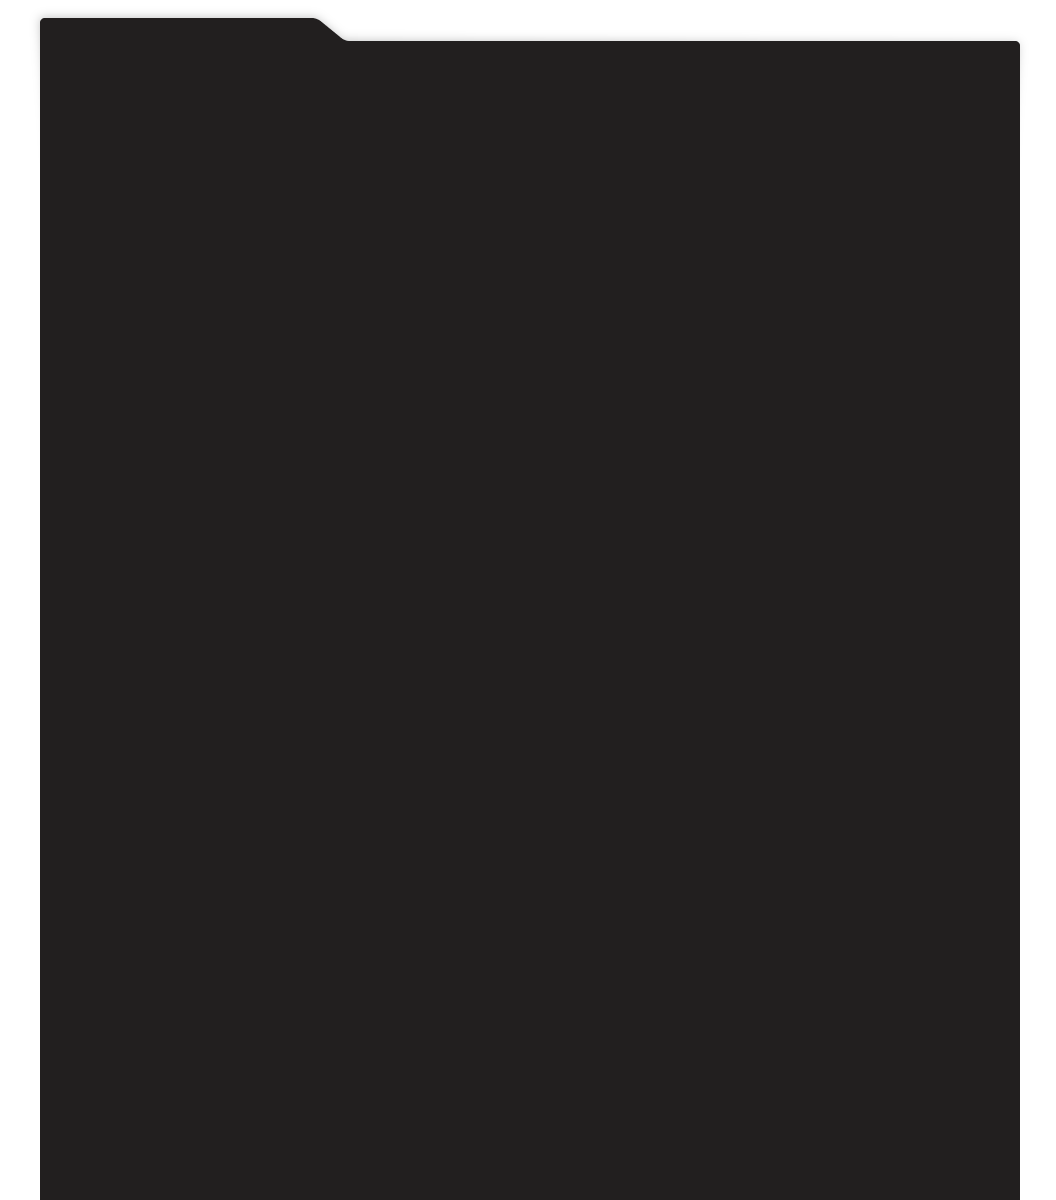
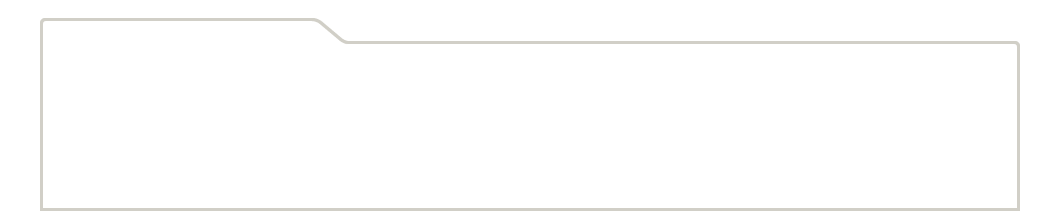
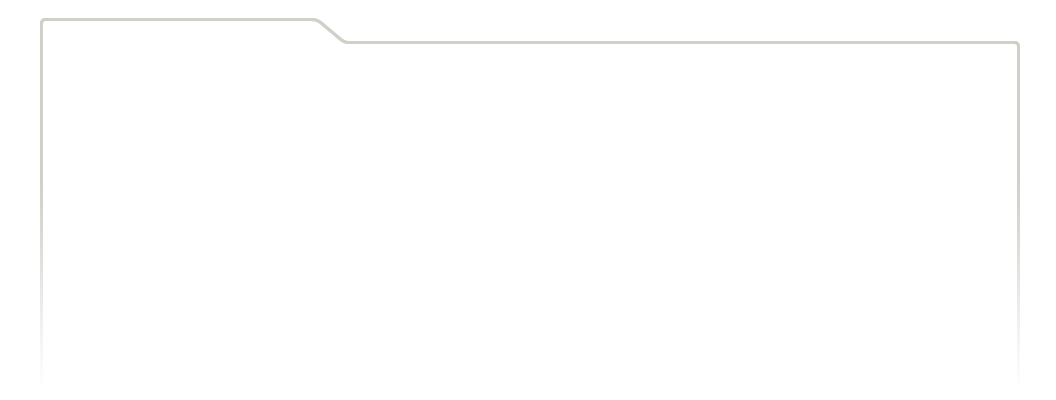
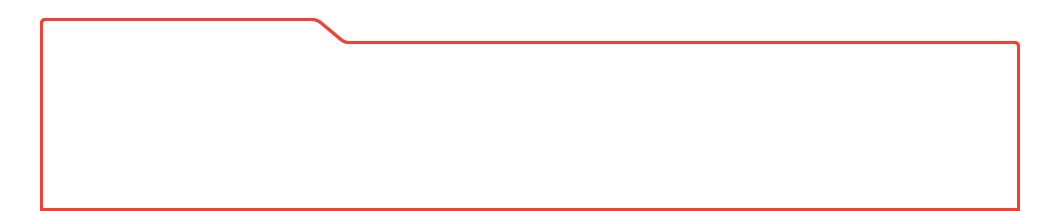
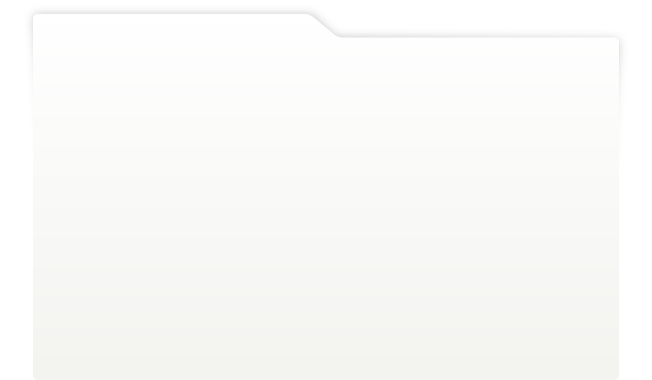
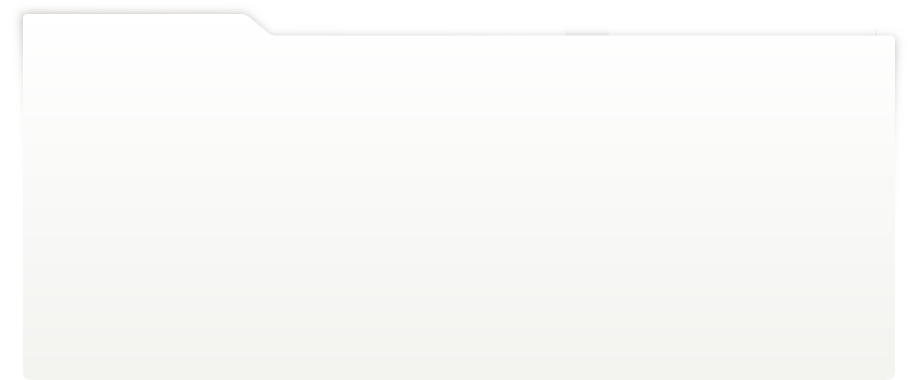
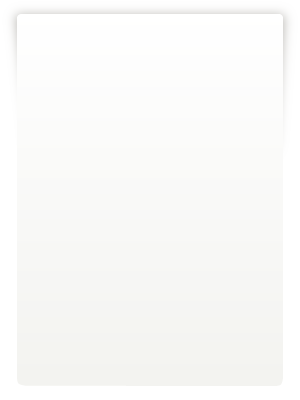
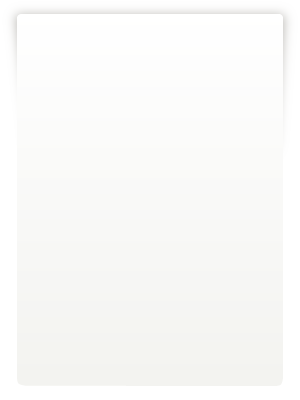
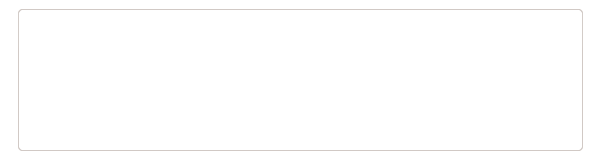
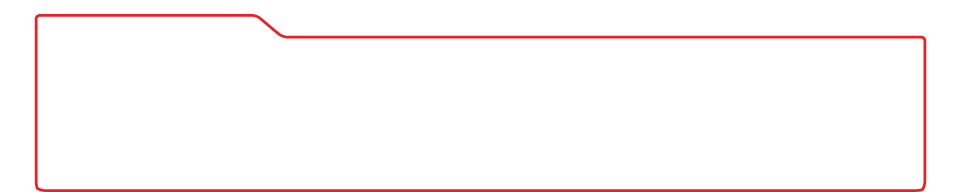
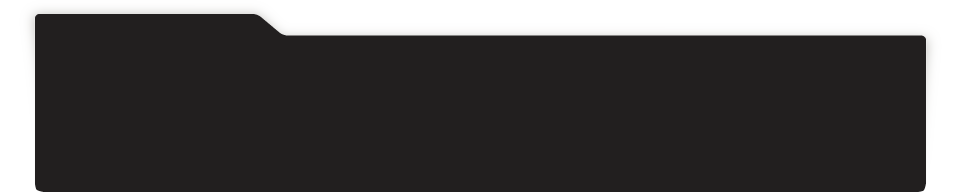
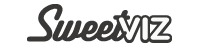
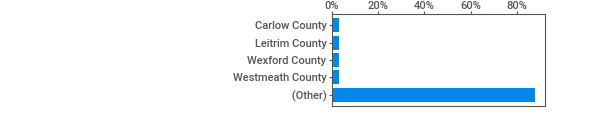
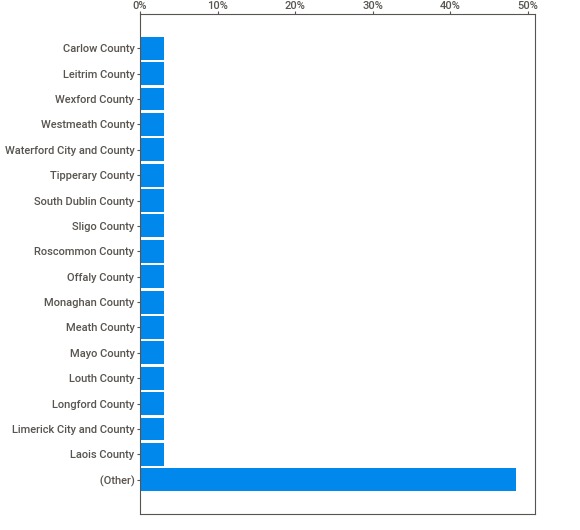
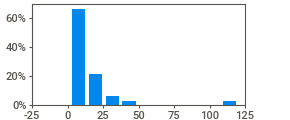
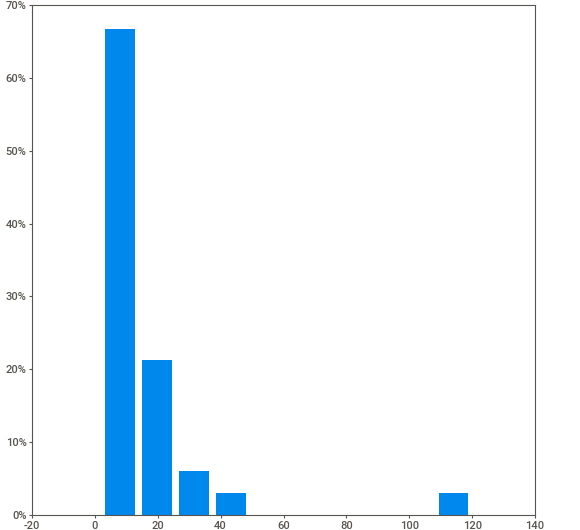
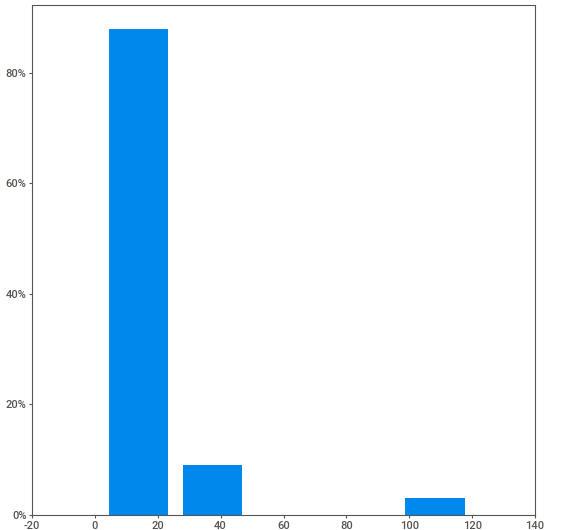
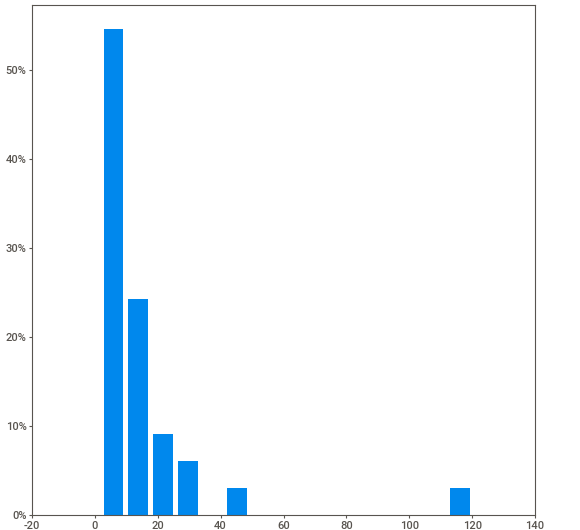
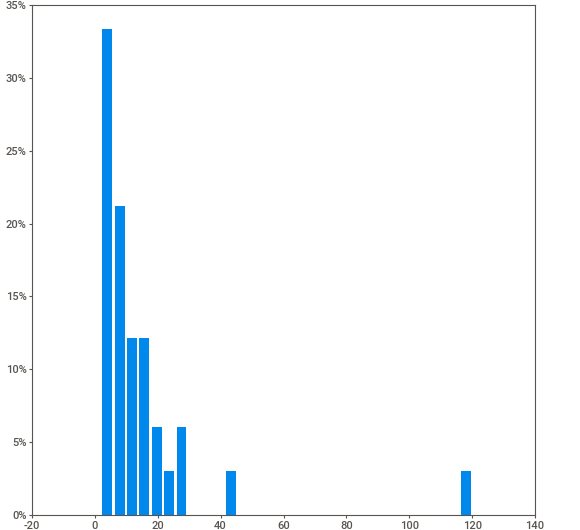
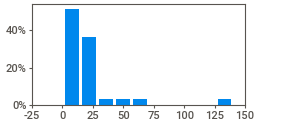
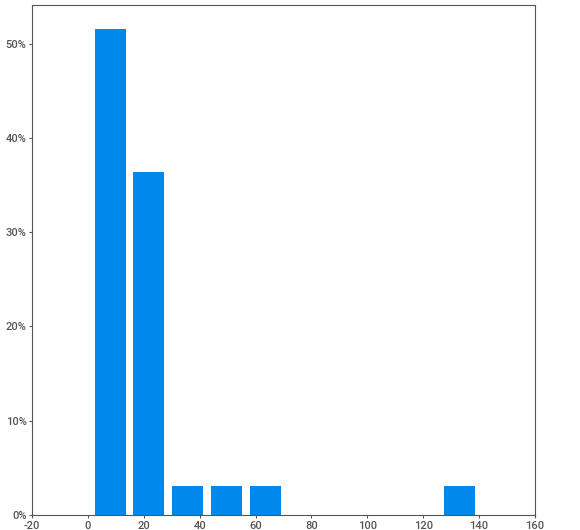
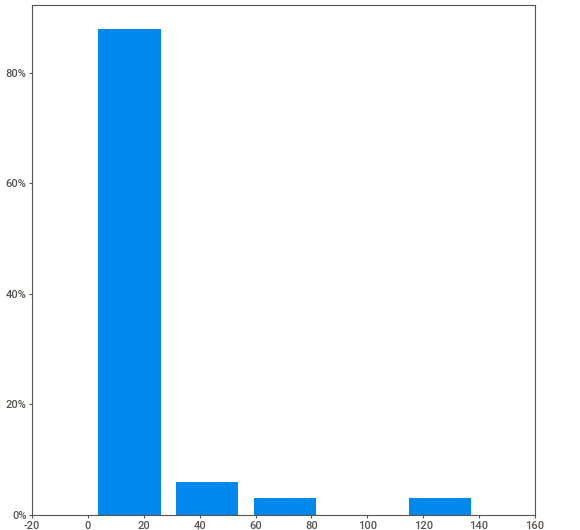
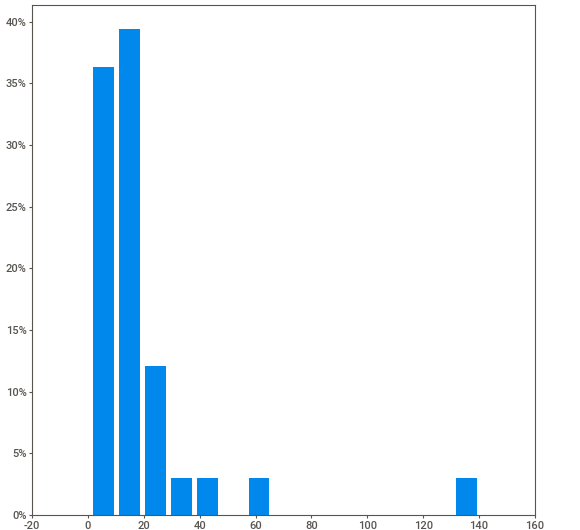
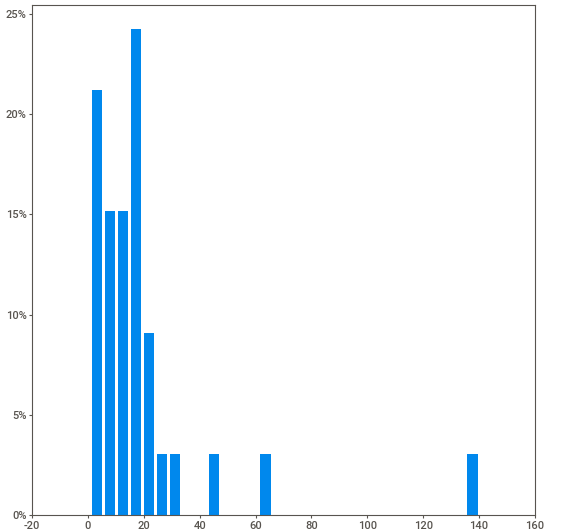
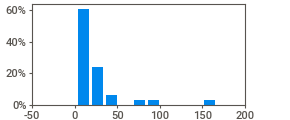
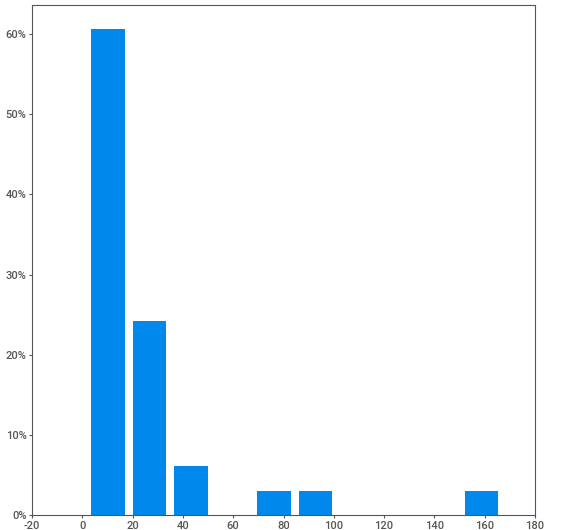
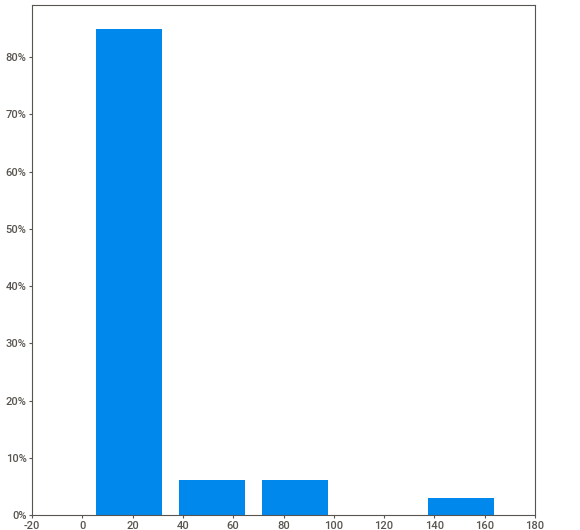
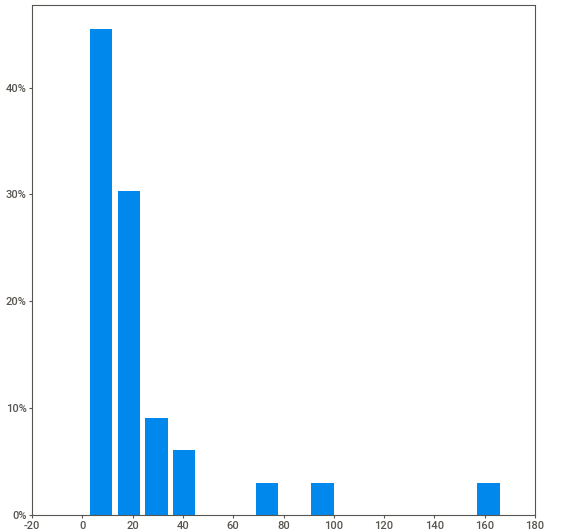
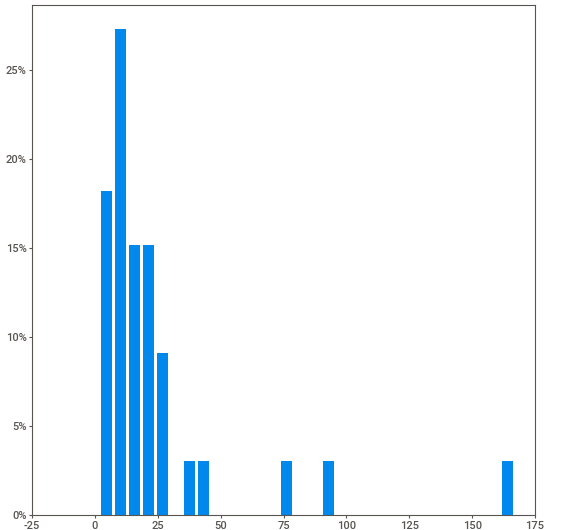
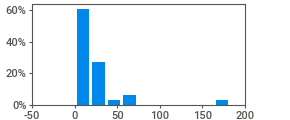
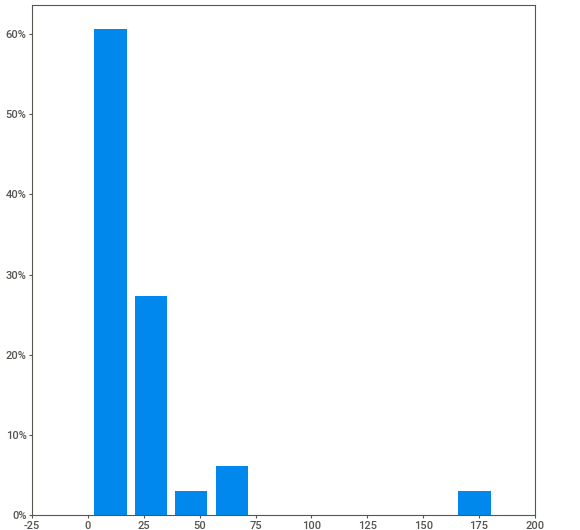
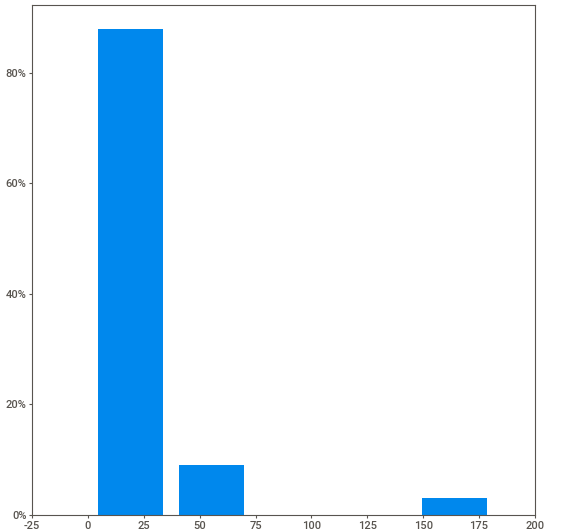
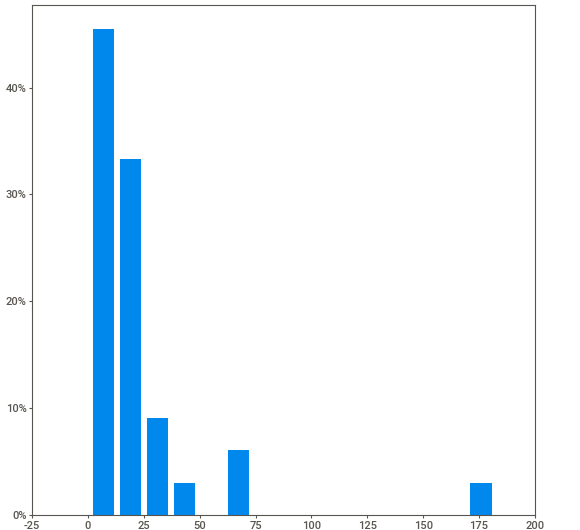
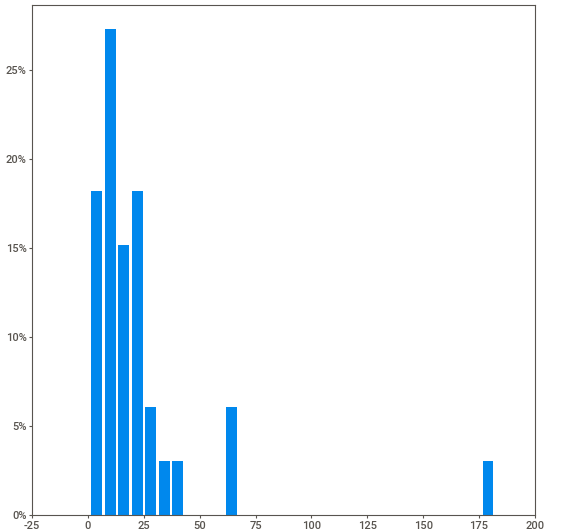
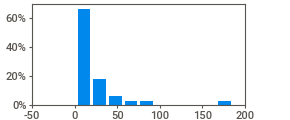
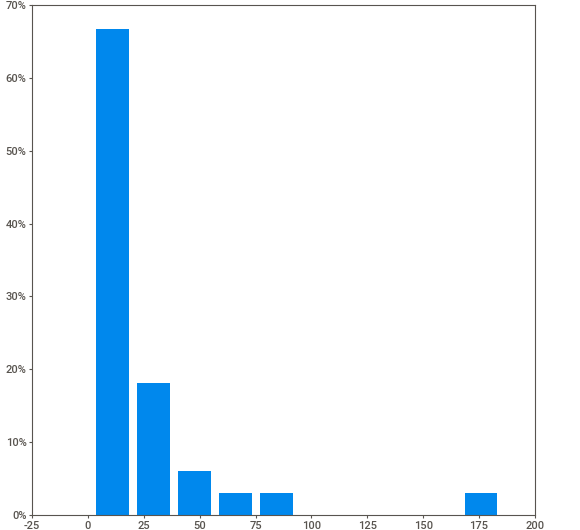
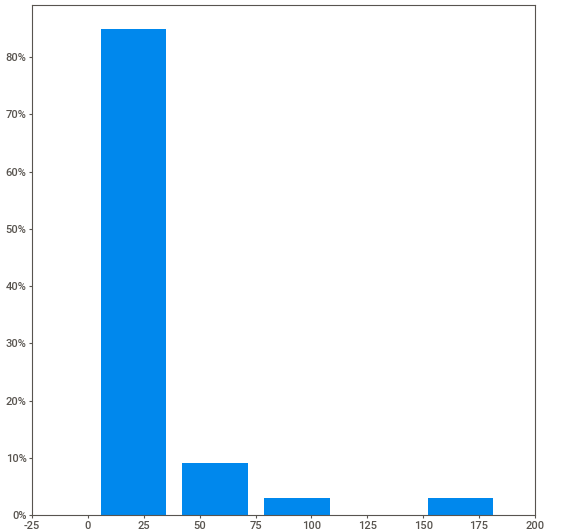
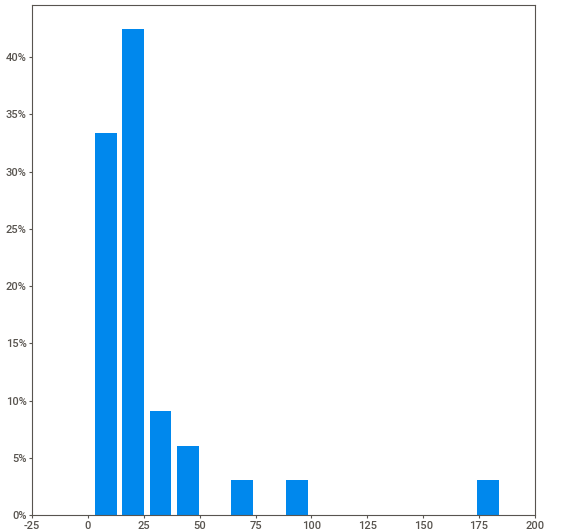
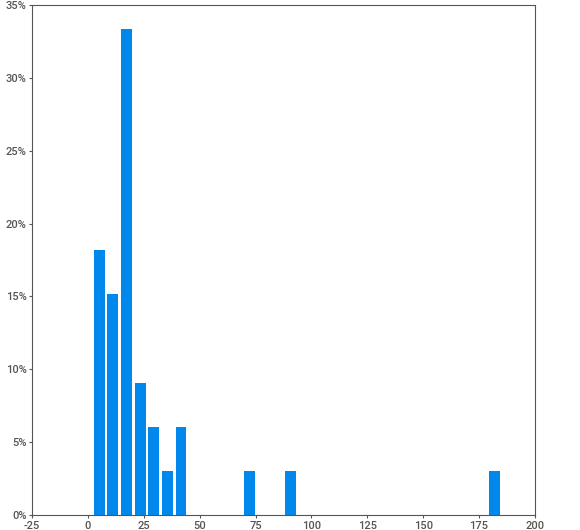
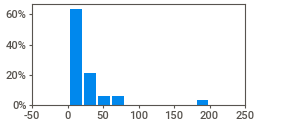
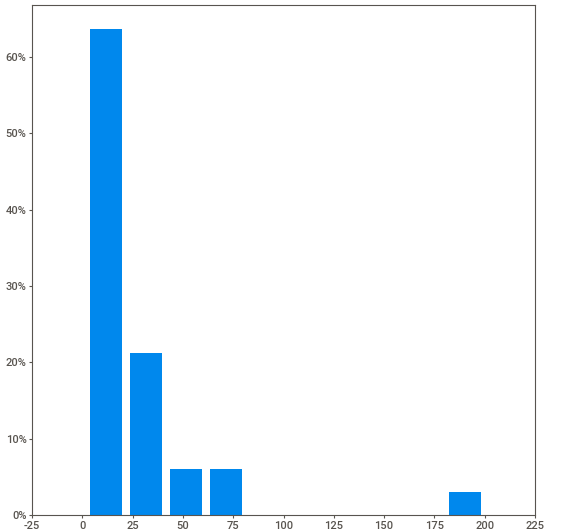
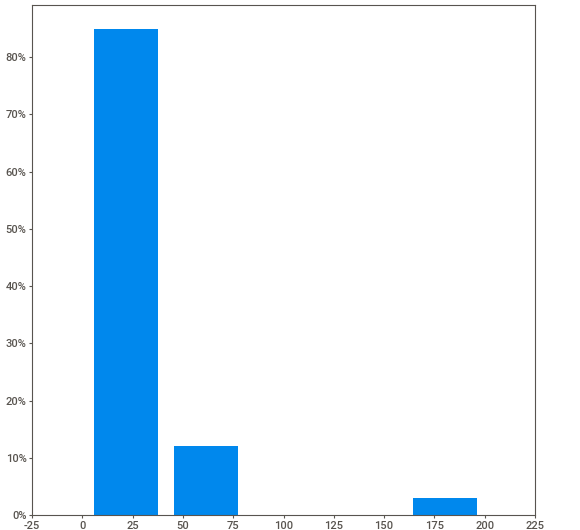
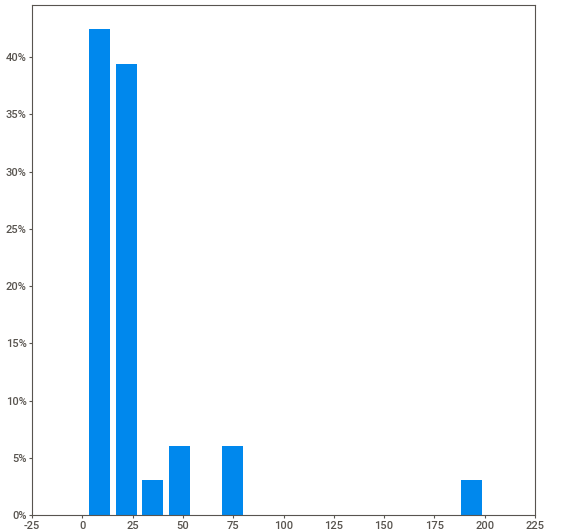
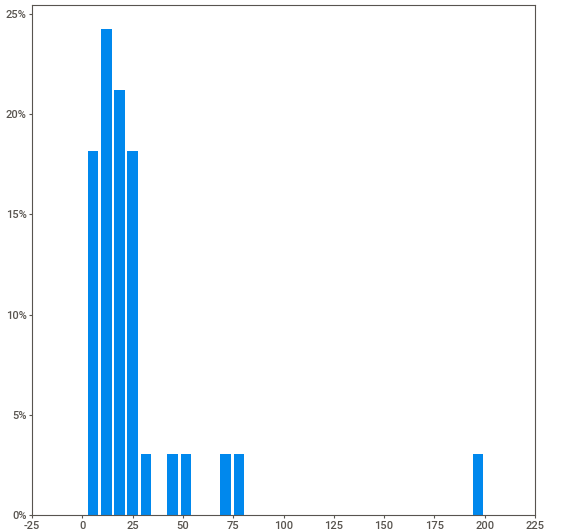
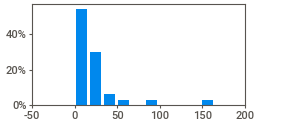
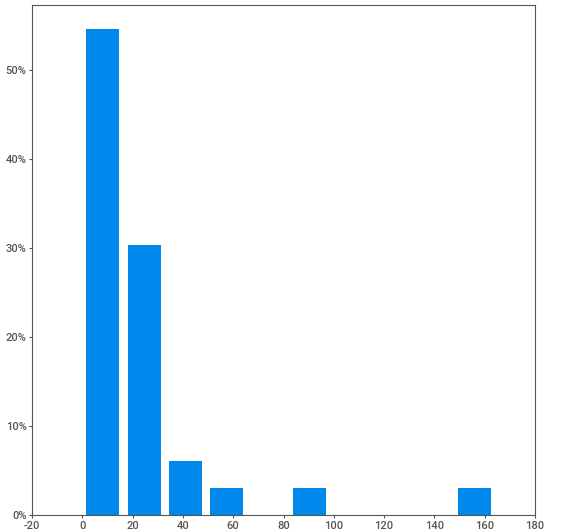
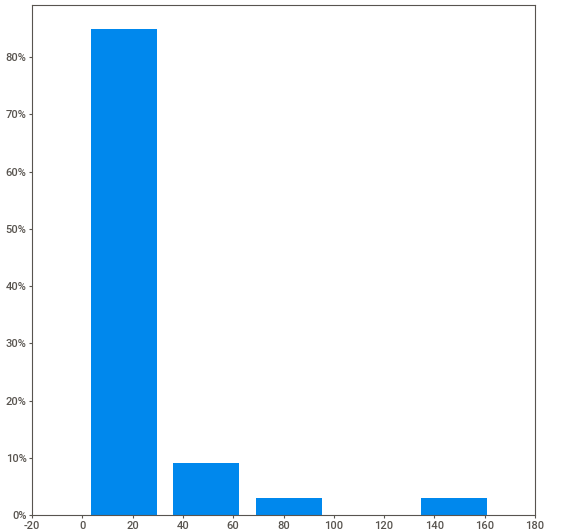
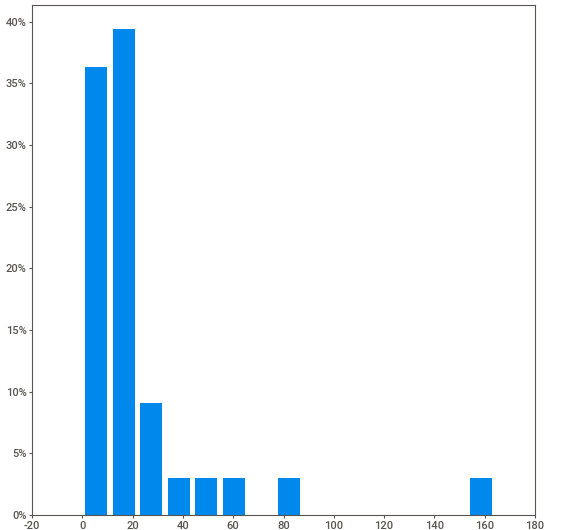
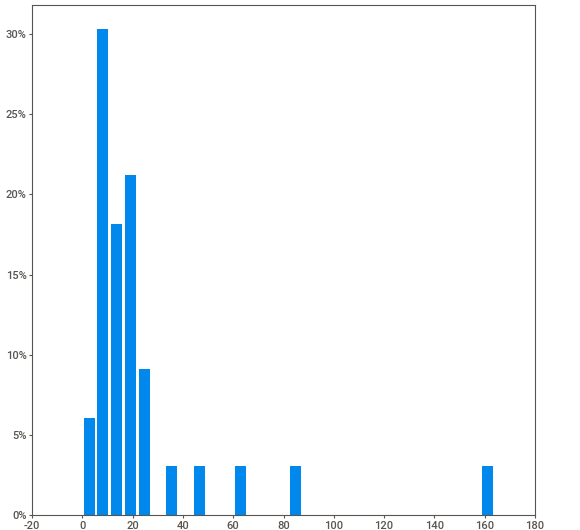
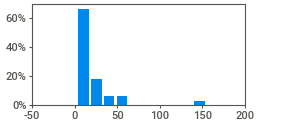
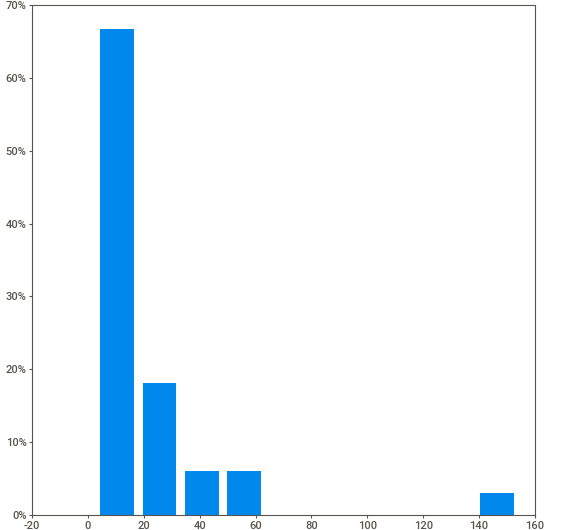
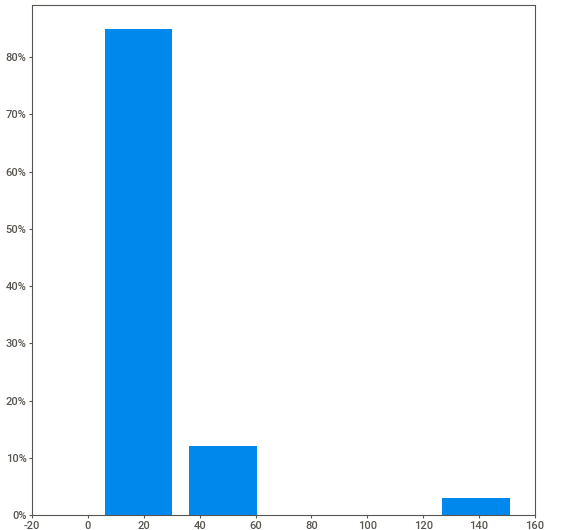
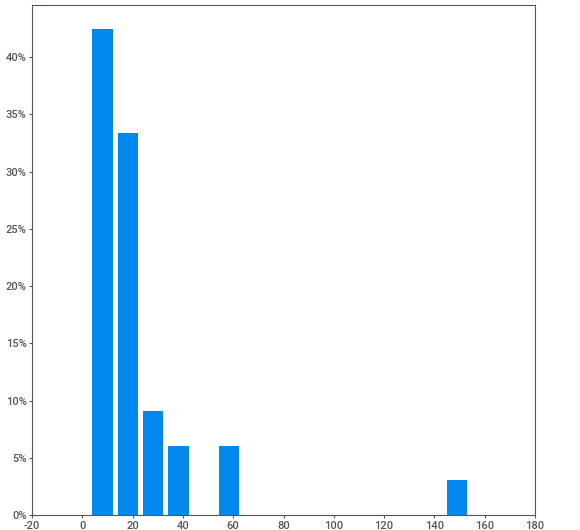
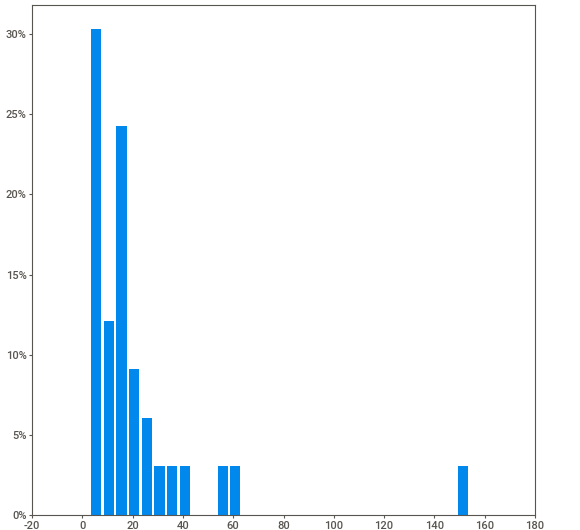
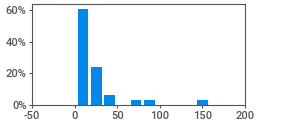
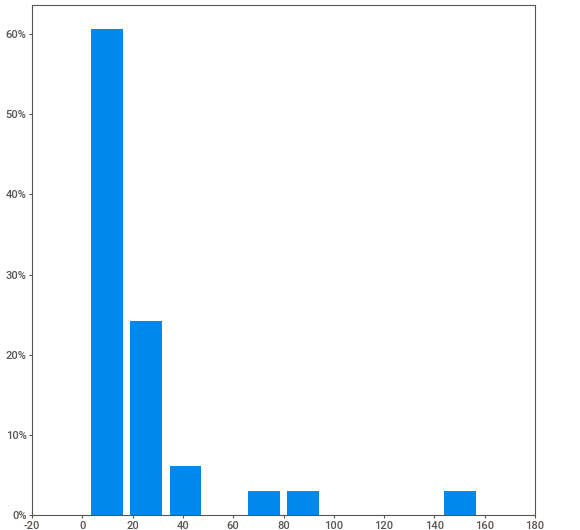
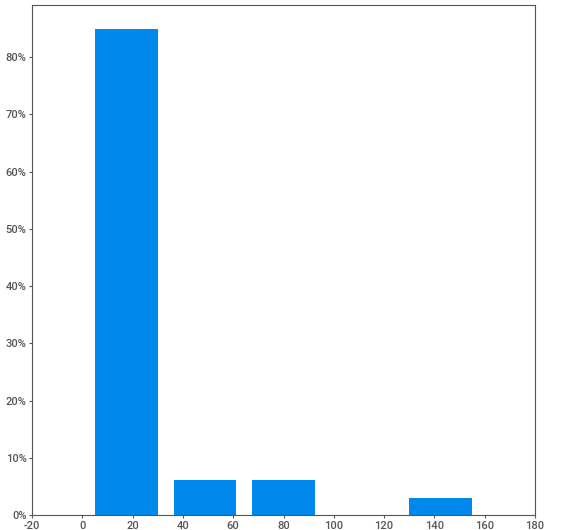
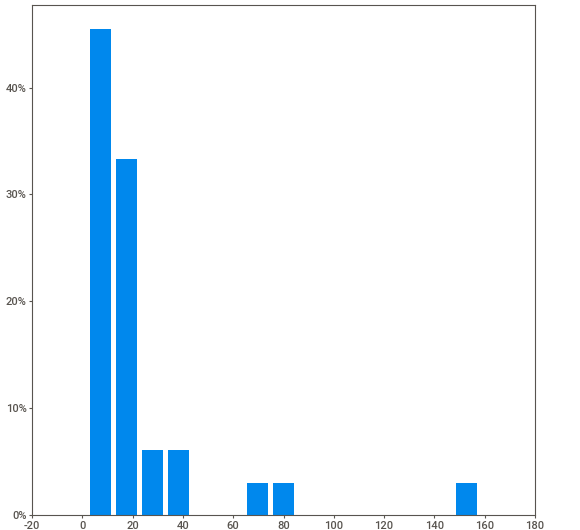
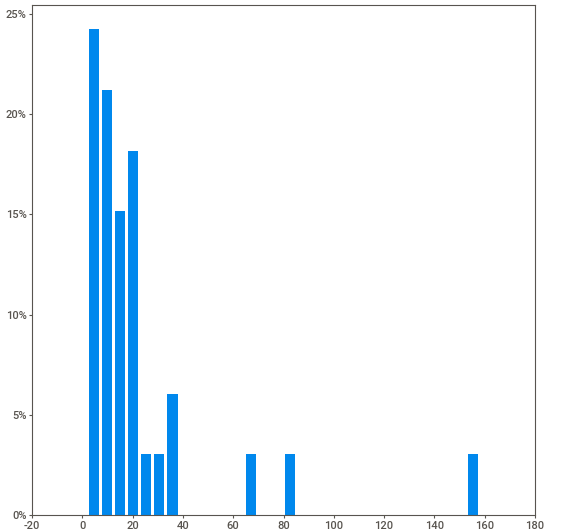
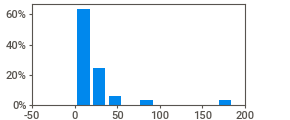
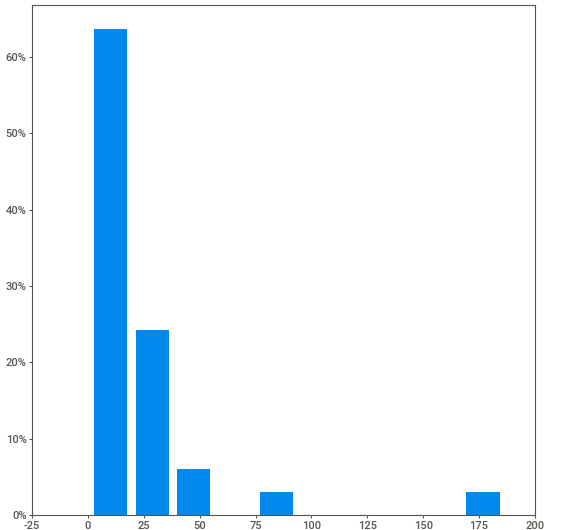
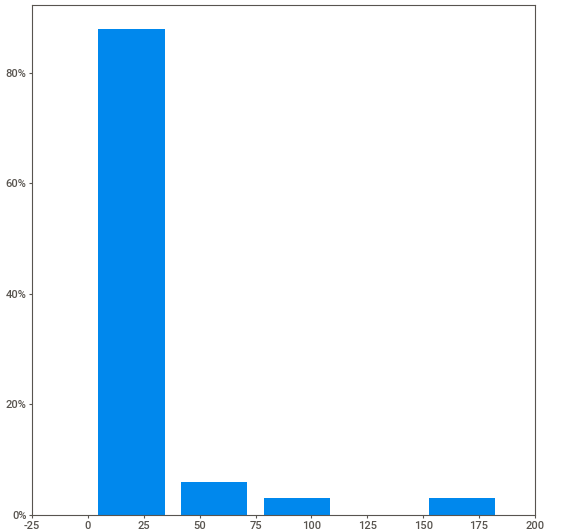
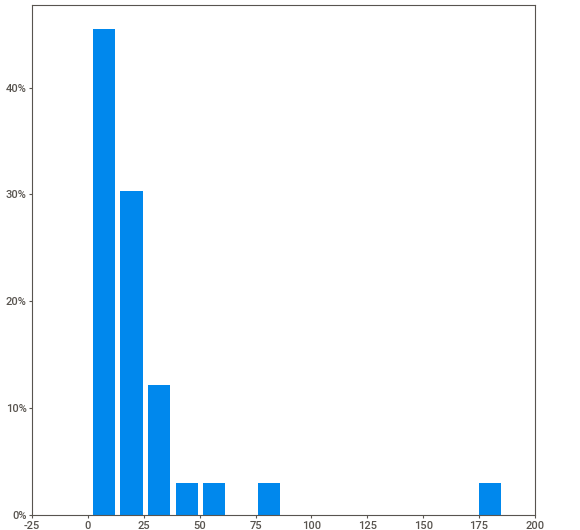
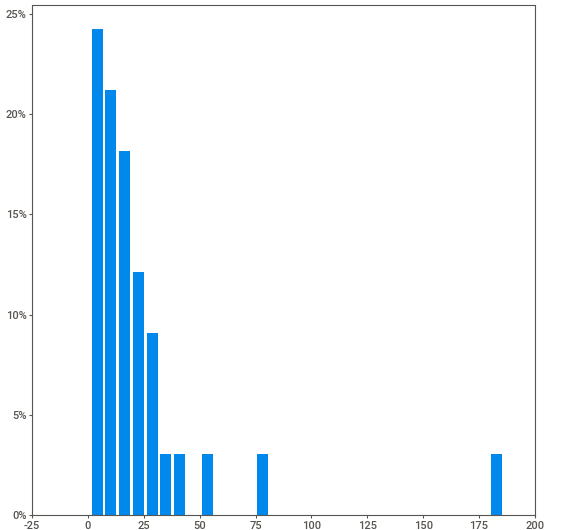
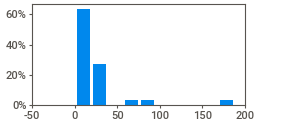
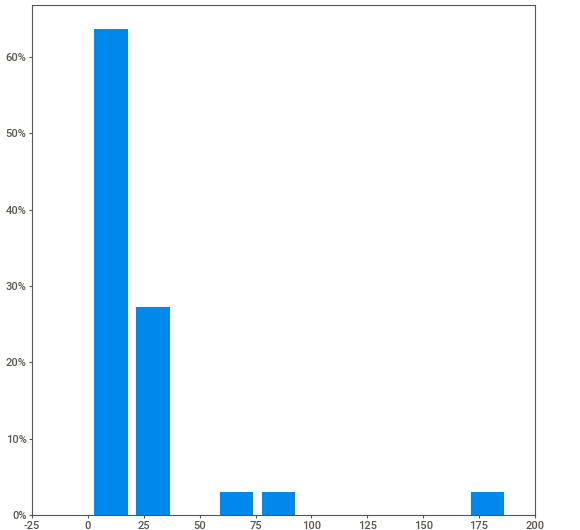
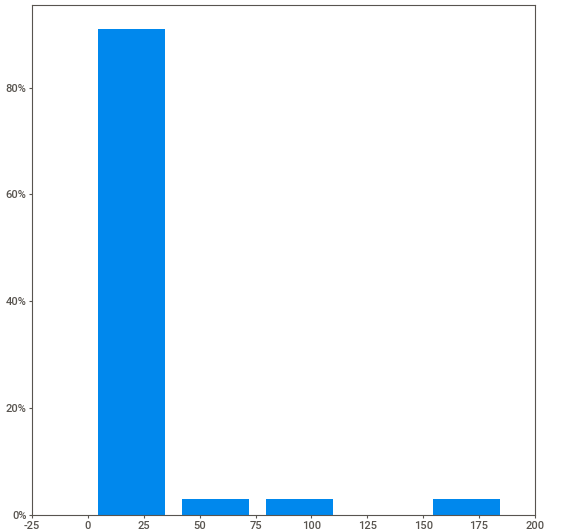
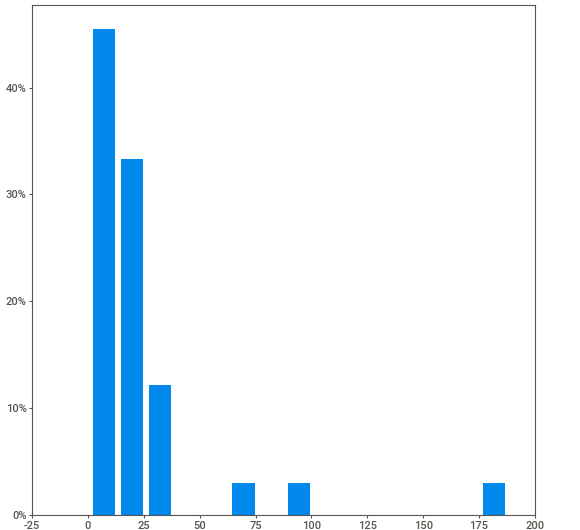
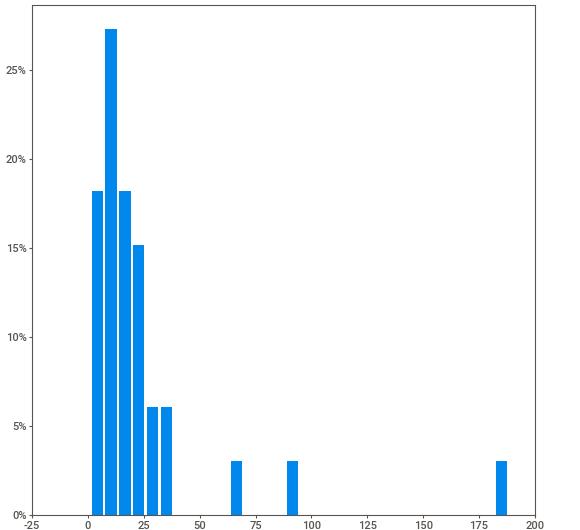
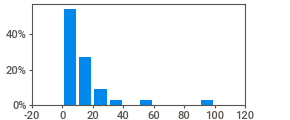
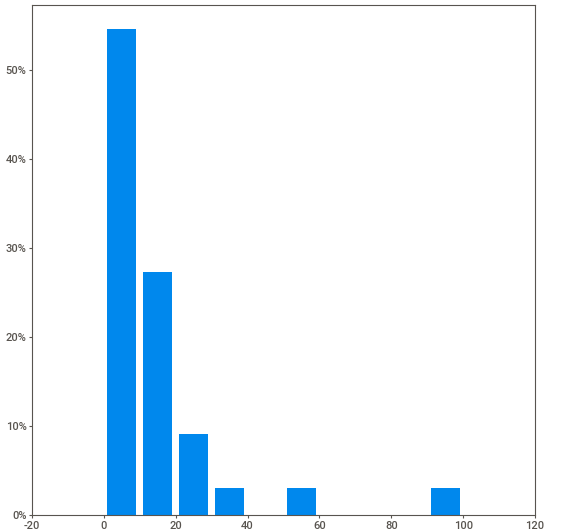
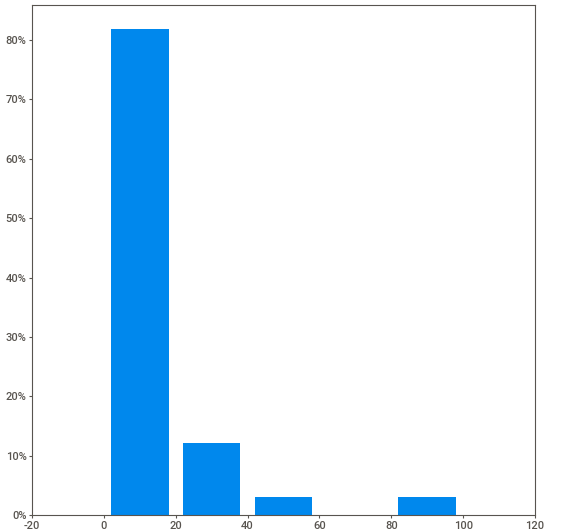
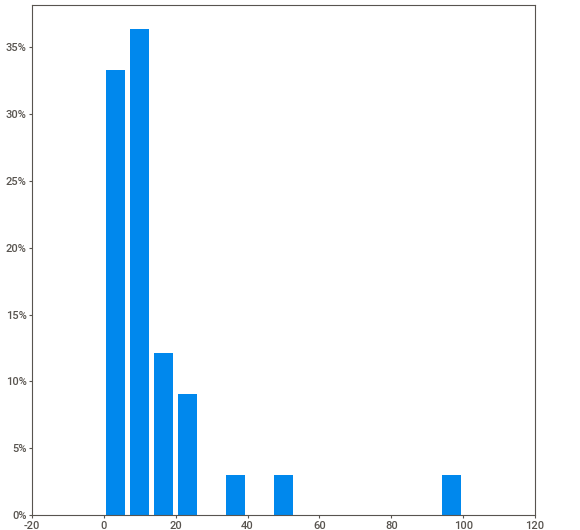
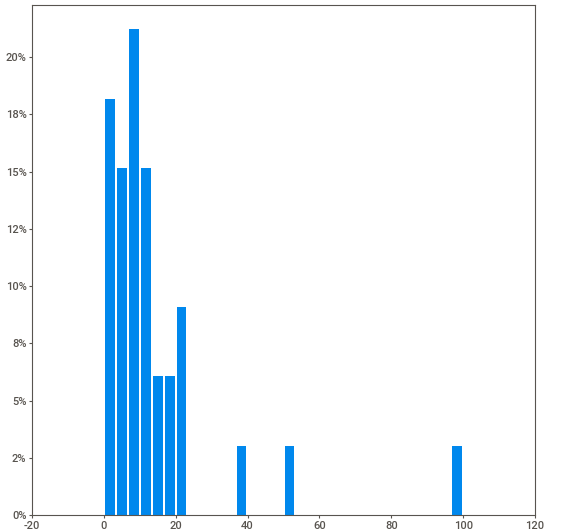
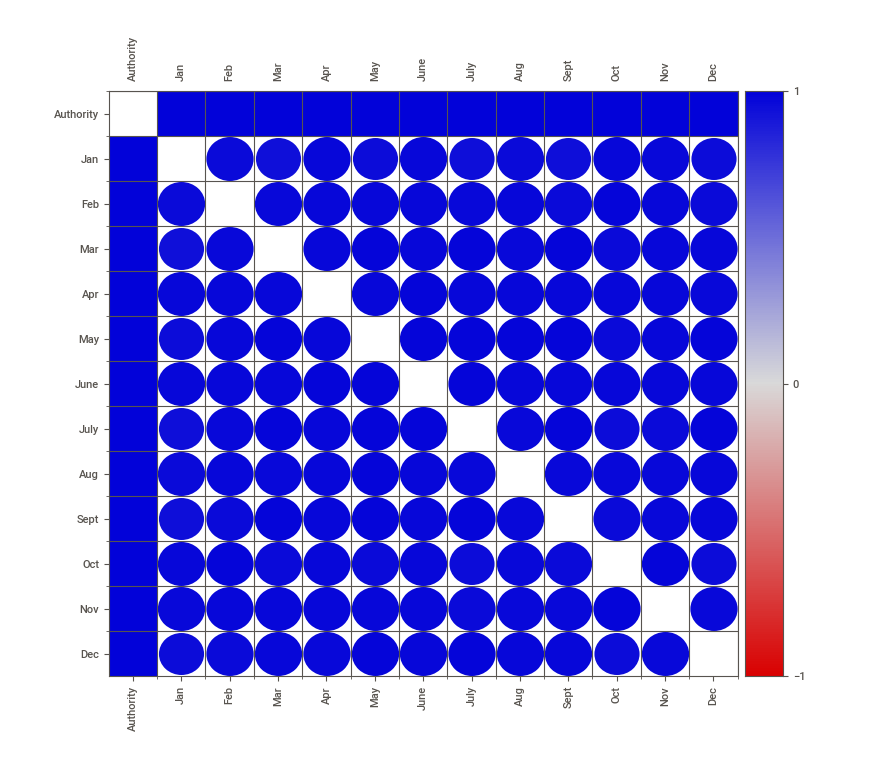
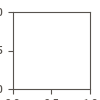

In [15]:
import sweetviz as sv
analyze_report = sv.analyze(df, pairwise_analysis="on")
analyze_report.show_html('Data EDA.html', open_browser=True)
analyze_report.show_notebook(w=None, 
                h=None, 
                scale=0.8,
                layout='vertical',
                filepath=None)

In [16]:
#import pandas as pd
#import numpy as np
# Interactive notebook using Bokeh
from bokeh.io import show, output_notebook, curdoc
from bokeh.plotting import figure
from bokeh.layouts import row, column
from bokeh.resources import INLINE

In [17]:
df.head()

Authority  Jan  Feb  Mar  Apr  May  June  July  Aug  Sept  Oct  Nov  \
0  Carlow County    4    1    3    3    9    10    10    4     5    7    5   
1   Cavan County    6    8    7    8    9     4    10    8    12   13    8   
2   Clare County    4   23   15   13   17    22    16   19    12   11   15   
3      Cork City    4    4    4    6    2     7     6    3     4    7    4   
4    Cork County   26   47   90   65   88    74    87   63    84   51   69   

   Dec  
0    9  
1    0  
2    8  
3    3  
4   50

In [39]:
df_avg_by_authority = df.groupby(by="Authority").mean()
2
bar_chart = figure(title="Average")

bar_chart.vbar(x = [1,2,3],
         width=0.9,
         top=df_avg_by_authority["Aug"],
         fill_color="tomato", line_color="tomato", alpha=0.9)

bar_chart.xaxis.axis_label="Authority"
bar_chart.yaxis.axis_label="Aug"

bar_chart.xaxis.ticker = [1, 2, 3]
bar_chart.xaxis.major_label_overrides = {1: 'Cork County', 2: 'Cork City', 3: 'Clare County'}

show(bar_chart)

In [40]:
df_avg_by_authority = df.groupby(by="Authority").mean()

bar_chart = figure(title="Average")

bar_chart.vbar(x = [1,2,3],
         width=0.9,
         top=df_avg_by_authority["Sept"],
         fill_color="lime", line_color="lime", alpha=0.9)

bar_chart.xaxis.axis_label="Authority"
bar_chart.yaxis.axis_label="lime"

bar_chart.xaxis.ticker = [1, 2, 3]
bar_chart.xaxis.major_label_overrides = {1: 'Cork County', 2: 'Cork City', 3: 'Clare County'}

show(bar_chart)

In [41]:
df_avg_by_authority = df.groupby(by="Authority").mean()

bar_chart = figure(title="Average")

bar_chart.vbar(x = [1,2,3],
         width=0.9,
         top=df_avg_by_authority["Oct"],
         fill_color="blue", line_color="blue", alpha=0.9)

bar_chart.xaxis.axis_label="Authority"
bar_chart.yaxis.axis_label="Oct"

bar_chart.xaxis.ticker = [1, 2, 3]
bar_chart.xaxis.major_label_overrides = {1: 'Cork County', 2: 'Cork City', 3: 'Clare County'}

show(bar_chart)

In [21]:
####  We admit defeat.  We can not proceed with this form of interactive dashbord (Bokeh).

In [22]:
#### Try again. Use plotly

In [23]:
import warnings
warnings.filterwarnings('ignore')
pd.options.plotting.backend="plotly"

In [24]:
df[["Jan","Feb","Mar","Apr"]].plot(kind='bar')

In [25]:
df[["May","June","July","Aug"]].plot(kind='line')

In [26]:
df[["Sept","Oct","Nov","Dec"]].plot(kind='scatter')

In [ ]:
###  For a planning official or an interested party in the CIF, this interactive dashboard of commencement notices for developments across Ireland could be most beneficial.  They display definite trends and patterns.

In [27]:
###  Let's apply our dashboard to a simple clustering algorithm. DBSCAN.

In [28]:
###  DBSCAN
x = df.loc[:, ['Jan', 'Sept']].values  ##  Choose two random months for investigation

In [29]:
from sklearn.cluster import DBSCAN
# cluster the data into four clusters
dbscan = DBSCAN(eps = 11, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

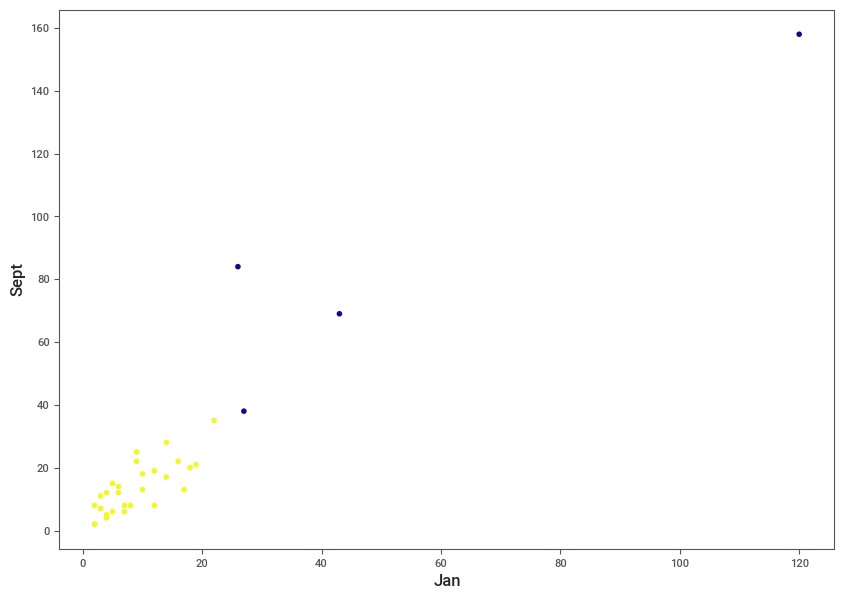

In [30]:
# Plot the clusters - Static
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Jan") # X-axis label
plt.ylabel("Sept") # Y-axis label
plt.show() # showing the plot

In [ ]:
df[["Sept","Jan"]].plot(kind='scatter') ### Interactive

#### Discuss in detail the process of acquiring your raw data, detailing the positive and/or negative aspects of your research and acquisition. This should include the relevance and implications of any and all licensing/permissions associated with the data

####  Answer: The author of this CA has a background in legal work and local government.  He found the Irish datasets easily on www.data.gov.ie and other public databases.  The data itself was generally processed well and needed little wrangling.  The problems arose he tried to find suitable datasets from abroad for comparision.  Collection methods were different, sampling methods varied and occasionally, some datasets were difficult to access because the api was not available or there was a charge to obtain it.  Sometimes the format was not csv, json or excel.  Going forward, its ridiculous if Twitter, lets say, wants to charge students, for an API key, simply so that they can research, for example, sentiments/attitudes towards house building in Eire vs N.I.

#### Exploratory Data Analysis helps to identify patterns, inconsistencies, anomalies, missing data, and other attributes and issues in data sets so problems can be addressed. Evaluate your raw data and detail, in depth, the various attributes and issues that you find. Your evaluation should reference evidence to support your  chosen methodology and use visualizations to illustrate your findings.

In [ ]:
#### The author chose to use CRISP DM.  Let's analyse a dataset in detail.

In [ ]:
df.columns

In [ ]:
df.isnull() ###  If numerical values were missing, we would have replaced them with the mean average or the median.

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
print(df.head(1))
print(df.sample(1))
print(df.tail(1))

In [ ]:
df=df[["Jan","Feb","Mar"]] ###  boxplot of first three numerical columns
df.boxplot()

###  We have outliers.  We can choose to remove or ignore them.  As they are not extraordinarily high, we leave them alone.

####  Tufte's principles

### https://jtr13.github.io/cc19/tuftes-principles-of-data-ink.html

#### Tufte gives the following five principles:

Above all else show data.
Maximize the data-ink ratio.
Erase non-data-ink.
Erase redundant data-ink.
Revise and edit of data-ink:

####  In other words, be clear, concise and don't mislead with the data.